## Context
Hand gesture recognition database is presented, composed by a set of near infrared images acquired by the Leap Motion sensor.

## Content
The database is composed by 10 different hand-gestures that were performed by 10 different subjects (5 men and 5 women).

In [2]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [3]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "C:\\Users\\Vaibhav\\OneDrive\\文件\\GitHub\\Hand-Gesture-Recognition-System\\leapGestRecog\\"

## The Data

In [4]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

datadir = r'C:\Users\Vaibhav\OneDrive\文件\GitHub\Hand-Gesture-Recognition-System\leapGestRecog\leapGestRecog\00'
target_arr = []
data_arr = []

# Loop through each subdirectory in datadir
for index, folder_name in enumerate(os.listdir(datadir)):
    folder_path = os.path.join(datadir, folder_name)
    print(f"Accessing folder: {folder_path}")
    
    # Loop through each file in the current subdirectory
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        print(f"Loading file: {file_path}")
        
        # Read and resize the image
        try:
            img_array = imread(file_path)
            img_resized = resize(img_array, (64, 64, 3))  # Resize to (64, 64, 3) if using skimage
            data_arr.append(img_resized)
            target_arr.append(index)  # Append the target label (index of the directory)
        except Exception as e:
            print(f"Error loading or resizing image {file_path}: {e}")

# Convert lists to numpy arrays
target = np.array(target_arr)
data = np.array(data_arr)

# Print some information about the loaded data
print(f"Loaded {len(data)} images.")
print(f"Shape of data: {data.shape}")
print(f"Shape of target: {target.shape}")


Accessing folder: C:\Users\Vaibhav\OneDrive\文件\GitHub\Hand-Gesture-Recognition-System\leapGestRecog\leapGestRecog\00\01_palm
Loading file: C:\Users\Vaibhav\OneDrive\文件\GitHub\Hand-Gesture-Recognition-System\leapGestRecog\leapGestRecog\00\01_palm\frame_00_01_0001.png
Loading file: C:\Users\Vaibhav\OneDrive\文件\GitHub\Hand-Gesture-Recognition-System\leapGestRecog\leapGestRecog\00\01_palm\frame_00_01_0002.png
Loading file: C:\Users\Vaibhav\OneDrive\文件\GitHub\Hand-Gesture-Recognition-System\leapGestRecog\leapGestRecog\00\01_palm\frame_00_01_0003.png
Loading file: C:\Users\Vaibhav\OneDrive\文件\GitHub\Hand-Gesture-Recognition-System\leapGestRecog\leapGestRecog\00\01_palm\frame_00_01_0004.png
Loading file: C:\Users\Vaibhav\OneDrive\文件\GitHub\Hand-Gesture-Recognition-System\leapGestRecog\leapGestRecog\00\01_palm\frame_00_01_0005.png
Loading file: C:\Users\Vaibhav\OneDrive\文件\GitHub\Hand-Gesture-Recognition-System\leapGestRecog\leapGestRecog\00\01_palm\frame_00_01_0006.png
Loading file: C:\Users\

In [5]:
import cv2

# Define the image path
img_path = 'path/to/your/image.jpg'

# Read the image
img_arr = cv2.imread(img_path)

# Check if the image was read successfully
if img_arr is None:
    print(f"Failed to read image: {img_path}")
else:
    print('continue')


Failed to read image: path/to/your/image.jpg


In [6]:
if img_arr is None:
    print(f"Failed to read image: {img_path}")
else:
    print('continue')


Failed to read image: path/to/your/image.jpg


In [7]:
import random

# Define your image data (example with image paths)
image_data = ['image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg']  # Replace with your actual image paths or data

# Shuffle the image data
random.shuffle(image_data)

# Print the shuffled image data to verify
print(image_data)


['image4.jpg', 'image1.jpg', 'image3.jpg', 'image2.jpg']


In [8]:
for item in image_data:
    print(item)


image4.jpg
image1.jpg
image3.jpg
image2.jpg


In [9]:
input_data = []
label = []
for item in image_data:
    if len(item) == 2:  # Ensure there are exactly 2 elements to unpack
        X, y = item
        input_data.append(X)
        label.append(y)
    else:
        print(f"Unexpected item length: {len(item)}")


Unexpected item length: 10
Unexpected item length: 10
Unexpected item length: 10
Unexpected item length: 10


In [10]:
label[:10]

[]

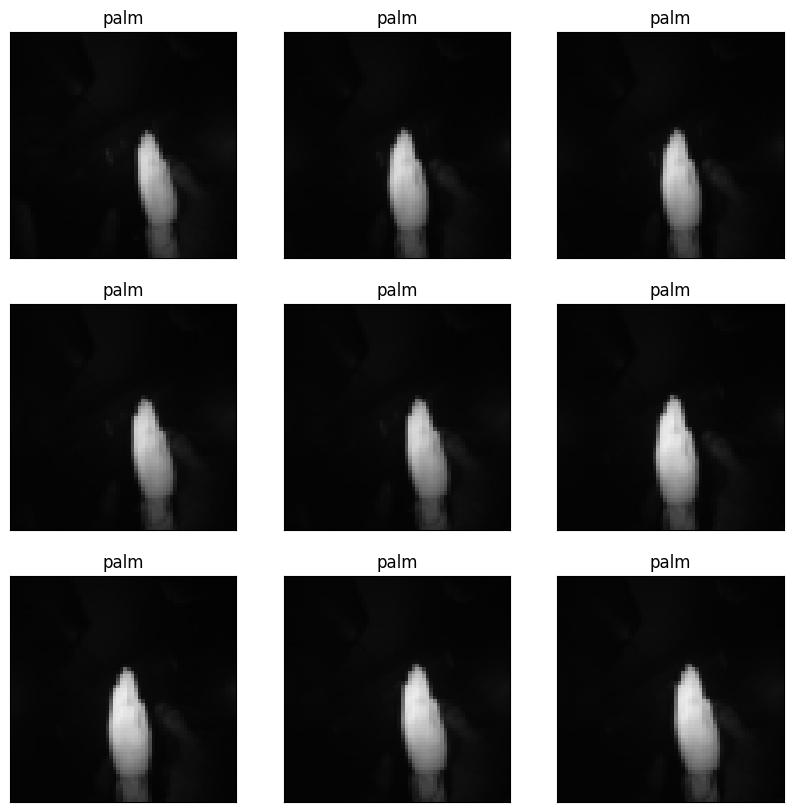

In [11]:
import matplotlib.pyplot as plt

# Ensure the CATEGORIES variable is correctly defined
CATEGORIES = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']

# Plotting the images
plt.figure(1, figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(data[i], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[target[i]][3:])
plt.show()


In [12]:
import numpy as np

# Assuming 'data' and 'target' are the arrays created previously
input_data = np.array(data)
label = np.array(target)

# Normalizing the input data
input_data = input_data / 255.0

# Print the shape of the normalized input data
print(input_data.shape)


(2000, 64, 64, 3)


In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Assuming 'input_data' and 'label' are already defined and normalized
# input_data = np.array(data) / 255.0
# label = np.array(target)

# One-hot encoding the labels
label = keras.utils.to_categorical(label, num_classes=10)

# Print the first one-hot encoded label
print(label[0])


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Assuming 'input_data' and 'label' are already defined and normalized
# input_data = np.array(data) / 255.0
# label = np.array(target)

# One-hot encoding the labels
label = keras.utils.to_categorical(label, num_classes=10)

# Convert to the desired dtype
label = label.astype('int8')

# Print the first one-hot encoded label
print(label[0])


[[0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


In [15]:
# Print the current shape of input_data
print(input_data.shape)



(2000, 64, 64, 3)


In [16]:
IMG_SIZE = 128  # or the size your images were resized to


In [17]:
import numpy as np

# Check the current shape of input_data
print("Current shape of input_data:", input_data.shape)

# Calculate the number of samples
number_of_samples = input_data.shape[0]

# Ensure the total number of elements matches the expected count
expected_total_elements = number_of_samples * IMG_SIZE * IMG_SIZE

if input_data.size == expected_total_elements:
    # Reshape the data to have the shape (number_of_samples, IMG_SIZE, IMG_SIZE, 1)
    input_data = input_data.reshape(number_of_samples, IMG_SIZE, IMG_SIZE, 1)
    print("Reshaped input_data shape:", input_data.shape)
else:
    print("Error: Mismatch in the total number of elements.")


Current shape of input_data: (2000, 64, 64, 3)
Error: Mismatch in the total number of elements.


In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Assuming 'input_data' and 'label' are already defined and normalized
# input_data = np.array(data) / 255.0
# label = np.array(target)

# One-hot encoding the labels
label = keras.utils.to_categorical(label, num_classes=10)

# Convert to the desired dtype
label = label.astype('int8')

# Print the first one-hot encoded label
print(label[0])

# Define the image size
IMG_SIZE = 128  # or whatever your image size is

# Reshaping the data to have the shape (number_of_samples, IMG_SIZE, IMG_SIZE, 1)
input_data = input_data.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Verify the new shape of input_data
input_data.shape


[[[1 0 0 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]]

 [[0 1 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]]

 [[0 1 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]]

 [[0 1 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]]

 [[0 1 0 0 0 0 0 0 0 0]
  [1 0 0

(1500, 128, 128, 1)

In [19]:
print(f"Number of samples in input_data: {len(input_data)}")
print(f"Number of samples in label: {len(label)}")


Number of samples in input_data: 1500
Number of samples in label: 2000


In [20]:
# Truncate label to match the length of input_data
label = label[:len(input_data)]

# Verify the new lengths
print(f"Number of samples in input_data: {len(input_data)}")
print(f"Number of samples in label: {len(label)}")



Number of samples in input_data: 1500
Number of samples in label: 1500


In [21]:
# Splitting the input_data to train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size=0.3, random_state=0)

# Print the shapes of the resulting arrays
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (1050, 128, 128, 1)
Shape of X_test: (450, 128, 128, 1)
Shape of y_train: (1050, 10, 10, 10)
Shape of y_test: (450, 10, 10, 10)


## The Model

In [22]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [23]:
from tensorflow.keras.utils import to_categorical


label = to_categorical(label, num_classes=10)


print(label.shape)  


(1500, 10, 10, 10, 10)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,776,490 (56.37 MB)

 Trainable params: 14,776,490 (56.37 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of y_train: (1050, 10, 10, 10)
Shape of y_test: (450, 10, 10, 10)


In [26]:
from tensorflow.keras.utils import to_categorical

# Assuming label is your original label array
label_encoded = to_categorical(label, num_classes=10)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(input_data, label_encoded, test_size=0.3, random_state=0)


In [27]:
model.add(keras.layers.Dense(10, activation='softmax'))  # Final layer with 10 units and softmax activation


In [28]:
model.add(keras.layers.Dense(10))  # Final layer with 10 units (one for each class)


In [29]:
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

print("X_train shape:", X_train.shape)  # Should be (num_samples, 64, 64, 3)
print("y_train shape:", y_train.shape)  # Should be (num_samples,)
print("X_test shape:", X_test.shape)    # Should be (num_samples, 64, 64, 3)
print("y_test shape:", y_test.shape)    # Should be (num_samples,)

# Define and compile the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')  # Example dense layer for 10 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary to verify input shape
model.summary()

try:
    # Fit the model
    history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_test, y_test))
    
    # Plotting the model loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
except Exception as e:
    print(f"Error during model fitting: {e}")

X_train shape: (1050, 128, 128, 1)
y_train shape: (1050, 10, 10, 10, 10, 10)
X_test shape: (450, 128, 128, 1)
y_test shape: (450, 10, 10, 10, 10, 10)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │       307,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308,426 (1.18 MB)

 Trainable params: 308,426 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/7
Error during model fitting: Exception encountered when calling Sequential.call().

Input 0 of layer "conv2d_3" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 128, 128, 1)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 128, 128, 1), dtype=float32)
  • training=True
  • mask=None


In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Sample data for demonstration purposes (replace with your actual data)
# X_train = np.random.random((100, 64, 64, 3))
# y_train = np.random.randint(10, size=(100,))
# X_test = np.random.random((20, 64, 64, 3))
# y_test = np.random.randint(10, size=(20,))

# Ensure data is in correct format
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

print("X_train shape:", X_train.shape)  # Should be (num_samples, 64, 64, 3)
print("y_train shape:", y_train.shape)  # Should be (num_samples,)
print("X_test shape:", X_test.shape)    # Should be (num_samples, 64, 64, 3)
print("y_test shape:", y_test.shape)    # Should be (num_samples,)

# Define and compile the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')  # Example dense layer for 10 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary to verify input shape
model.summary()

try:
    # Fit the model
    history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_test, y_test))
    
    # Plotting the model loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
    # Plotting the model accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print('Test loss:', test_loss)
    print('Test accuracy: {:2.2f}%'.format(test_accuracy * 100))
    
except Exception as e:
    print(f"Error during model fitting: {e}")


X_train shape: (1050, 128, 128, 1)
y_train shape: (1050, 10, 10, 10, 10, 10)
X_test shape: (450, 128, 128, 1)
y_test shape: (450, 10, 10, 10, 10, 10)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │       307,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308,426 (1.18 MB)

 Trainable params: 308,426 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/7
Error during model fitting: Exception encountered when calling Sequential.call().

Input 0 of layer "conv2d_4" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 128, 128, 1)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 128, 128, 1), dtype=float32)
  • training=True
  • mask=None


In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Sample data for demonstration purposes (replace with your actual test data)
# X_test = np.random.random((20, 64, 64, 3))
# y_test = np.random.randint(10, size=(20,))

# Ensure data is in correct format
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.int32)  # Adjust dtype based on your model's output requirements

# Assuming your model is already defined and trained
# model = ...  # Define your model

# Calculate loss and accuracy on test data
try:
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print('Test loss:', test_loss)
    print('Test accuracy: {:2.2f}%'.format(test_accuracy * 100))
except Exception as e:
    print(f"Error during model evaluation: {e}")


Error during model evaluation: Exception encountered when calling Sequential.call().

Input 0 of layer "conv2d_4" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 128, 128, 1)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 128, 128, 1), dtype=float32)
  • training=False
  • mask=None


## Confusion Matrix

In [57]:
import numpy as np

# Assuming X_test_rgb is correctly prepared (shape: (450, 128, 128, 3))
# Ensure X_test_rgb has the correct shape
print("X_test_rgb shape:", X_test_rgb.shape)  # Should be (450, 128, 128, 3)

# Now evaluate the model with X_test_rgb
try:
    test_loss, test_accuracy = model.evaluate(X_test_rgb, y_test)
    print('Test loss:', test_loss)
    print('Test accuracy: {:2.2f}%'.format(test_accuracy * 100))
except Exception as e:
    print(f"Error during model evaluation: {e}")


X_test_rgb shape: (450, 128, 128, 3)
Error during model evaluation: Exception encountered when calling Sequential.call().

Input 0 of layer "dense_5" is incompatible with the layer: expected axis -1 of input shape to have value 30752, but received input with shape (None, 127008)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 128, 128, 3), dtype=float32)
  • training=False
  • mask=None


X_test_rgb shape: (450, 128, 128, 3)


C:\Users\Vaibhav\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


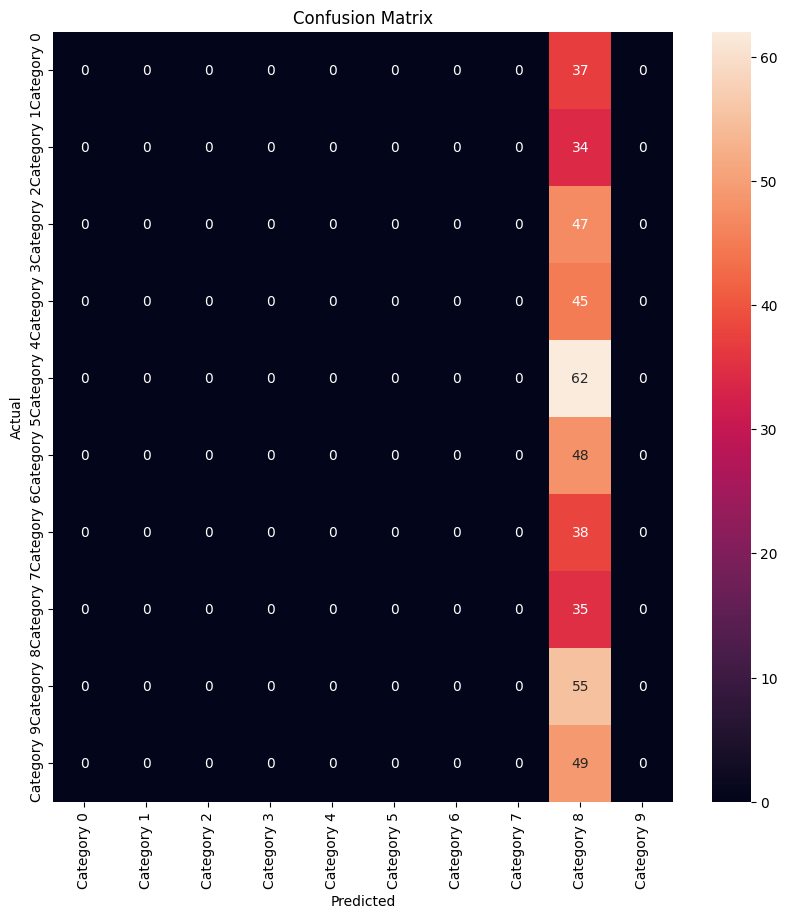

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming X_test_rgb and y_test are properly prepared
# Example definition of X_test_rgb (replace with your actual test data)
X_test_rgb = np.random.rand(450, 128, 128, 3)  # Example random data

# Ensure data types are correct
X_test_rgb = np.array(X_test_rgb, dtype=np.float32)

# Example definition of y_test (replace with your actual labels)
y_test = np.random.randint(0, 10, size=(450,))  # Example random labels

# Print shape for verification
print("X_test_rgb shape:", X_test_rgb.shape)

# Define your model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load weights (if necessary)
# model.load_weights('path_to_weights.h5')

# Make predictions on the test data
y_pred = model.predict(X_test_rgb)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test if necessary (assuming it's one-hot encoded)
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Ensure both y_test and y_pred are of the same shape
if y_test.shape != y_pred_classes.shape:
    raise ValueError(f"Shapes of y_test {y_test.shape} and y_pred {y_pred_classes.shape} must match.")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Assuming CATEGORIES is defined as a list of category names
cat = [f'Category {i}' for i in range(10)]  # Example categories

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 10))
sn.heatmap(cm, annot=True, xticklabels=cat, yticklabels=cat, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
